In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('mesh.dat', delim_whitespace=True)  


print(data.head())


x = data[:, 0]  
y = data[:, 1]  


plt.plot(x, y)


plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot of Data from .dat file')


plt.show()


          X         Y
0  7.886064  6.359793
1  2.321047  8.954139
2  0.241770  4.484384
3  8.585893  9.667951
4  0.733972  4.184429


InvalidIndexError: (slice(None, None, None), 0)

In [13]:
#import numpy as np

# Load the data as a NumPy array
#data = np.loadtxt('mesh.dat')

# Access the columns
#x = data[:, 0]  # First column
#y = data[:, 1]  # Second column

# Plot the data
#import matplotlib.pyplot as plt
#plt.plot(x, y)
#plt.xlabel('X-axis label')
#plt.ylabel('Y-axis label')
#plt.title('Plot of Data from .dat file')
#plt.show()



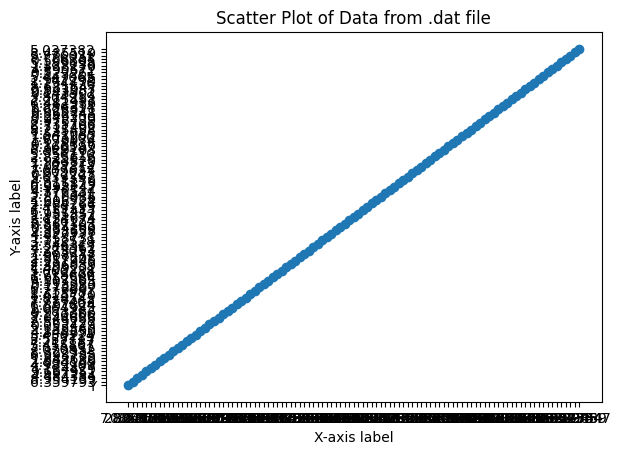

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('mesh.dat', delim_whitespace=True, header=None)

# Access the columns 
x = data[0]  # First column
y = data[1]  # Second column

# Create a scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot of Data from .dat file')

# Display the plot
plt.show()


          0         1
0         X         Y
1  7.886064  6.359793
2  2.321047  8.954139
3  0.241770  4.484384
4  8.585893  9.667951
1 1


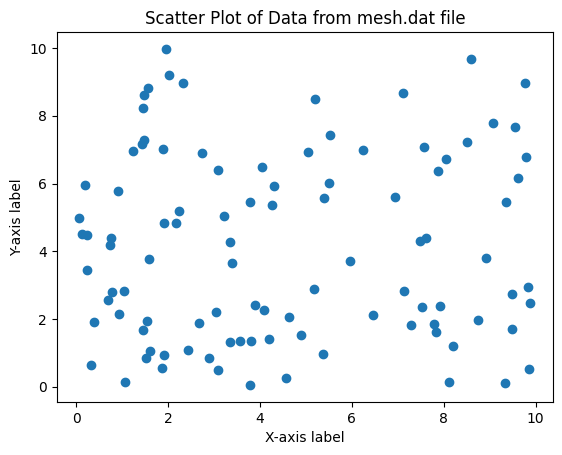

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('mesh.dat', delim_whitespace=True, header=None)

print(data.head())

#converts columns to numeric 
x = pd.to_numeric(data[0], errors='coerce')
y = pd.to_numeric(data[1], errors='coerce')

#checks if there are any missing values that caused the errors
print(x.isnull().sum(), y.isnull().sum())  

#drops any rows with bad values
x = x.dropna()
y = y.dropna()


plt.scatter(x, y)


plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot of Data from mesh.dat file')


plt.show()


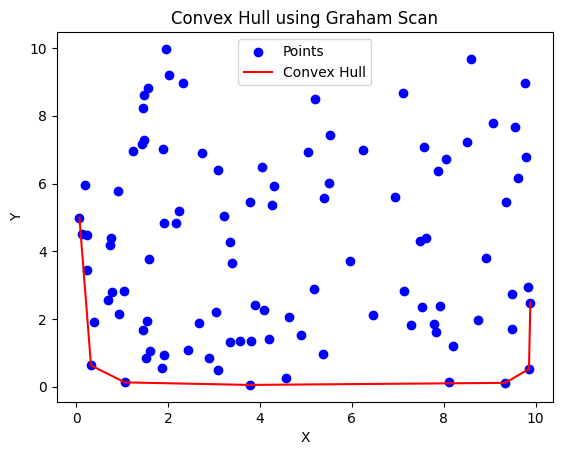

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 0 -> p, q and r are collinear
# 1 -> Clockwise
# 2 -> Counterclockwise
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  
    elif val > 0:
        return 1  
    else:
        return 2  


def graham_scan(points):
    
    points = sorted(points)

    #finds the pivot
    pivot = points[0]

    #sorts the remaining points based on polar angle 
    def polar_angle(p):
        return (p[0] - pivot[0], p[1] - pivot[1])

    sorted_points = sorted(points[1:], key=polar_angle)

    #initializes the convex hull 
    hull = [pivot]

    #iterates through sorted points
    for point in sorted_points:
        while len(hull) >= 2 and orientation(hull[-2], hull[-1], point) != 2:
            hull.pop()
        hull.append(point)

    return hull

# Function to load .dat file and extract points
def load_data(file):
    
    data = pd.read_csv(file, delim_whitespace=True, header=None)

    
    data = data.apply(pd.to_numeric, errors='coerce')

    
    points = list(zip(data[0], data[1]))

    return points

#visualizes the convex hull
def plot_convex_hull(points, hull):
    plt.figure()
    points = np.array(points)
    hull = np.array(hull)

    #plots the points
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')

    #plots the convex hull
    plt.plot(np.append(hull[:, 0], hull[0, 0]), np.append(hull[:, 1], hull[0, 1]), color='red', label='Convex Hull')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Convex Hull using Graham Scan')
    plt.show()


file = 'mesh.dat'  
points = load_data(file)


hull = graham_scan(points)


plot_convex_hull(points, hull)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 0 -> p, q and r are collinear
# 1 -> Clockwise
# 2 -> Counterclockwise
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0 
    elif val > 0:
        return 1  
    else:
        return 2  


def jarvis_march(points):
    #finds the leftmost point 
    leftmost = min(points, key=lambda p: p[0])

    hull = []
    p = leftmost
    while True:
        #adds the current point to the hull
        hull.append(p)
        #next point
        q = points[0]
        for r in points[1:]:
            if q == p or orientation(p, q, r) == 2:
                q = r
        #sets q as the new point and repeats 
        p = q
        if p == leftmost:
            break

    return hull


def load_data(file):
    
    data = pd.read_csv(file, delim_whitespace=True, header=None)

    data = data.apply(pd.to_numeric, errors='coerce')

    points = list(zip(data[0], data[1]))

    return points

# visualizes the convex hull
def plot_convex_hull(points, hull):
    plt.figure()
    points = np.array(points)
    hull = np.array(hull)

    
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')

    
    plt.plot(np.append(hull[:, 0], hull[0, 0]), np.append(hull[:, 1], hull[0, 1]), color='red', label='Convex Hull')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Convex Hull using Jarvis March')
    plt.show()


file = 'mesh.dat'  
points = load_data(file)

hull = jarvis_march(points)

plot_convex_hull(points, hull) 

#not loading


In [ ]:
#Quickhull 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 0 -> p, q and r are collinear
# 1 -> Clockwise
# 2 -> Counterclockwise
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0 
    elif val > 0:
        return 1  
    else:
        return 2  


def distance(p, q, r):
    return abs((r[1] - q[1]) * p[0] - (r[0] - q[0]) * p[1] + r[0] * q[1] - r[1] * q[0]) / np.sqrt((r[1] - q[1])**2 + (r[0] - q[0])**2))

#function to find the farthest point from the line 
def farthest_point(points, p, q):
    max_dist = -1
    farthest = None
    for r in points:
        dist = distance(p, q, r)
        if dist > max_dist:
            farthest = r
            max_dist = dist
    return farthest

# QuickHull Algo
def quickhull(points):
    #if there are less than 3 points return them
    if len(points) < 3:
        return points

    # Step 1: Find the leftmost and rightmost points
    leftmost = min(points, key=lambda p: p[0])
    rightmost = max(points, key=lambda p: p[0])

    # Step 2: Divide the points into two subsets: one above the line, one below
    left_set = []
    right_set = []
    for point in points:
        if point == leftmost or point == rightmost:
            continue
        # determines which side of the line the point is on
        if orientation(leftmost, rightmost, point) == 2:
            left_set.append(point)
        else:
            right_set.append(point)

    # Step 3: Find the convex hull by recursively dividing the sets
    def convex_hull_subsets(leftmost, rightmost, points):
        if not points:
            return []
        
        #finds the farthest point from the line (leftmost, rightmost)
        farthest = farthest_point(points, leftmost, rightmost)
        
       
        left_of_farthest = []
        right_of_farthest = []
        for point in points:
            if point == farthest:
                continue
            if orientation(leftmost, farthest, point) == 2:
                left_of_farthest.append(point)
            elif orientation(farthest, rightmost, point) == 2:
                right_of_farthest.append(point)

        #recursively finds the convex hull
        return convex_hull_subsets(leftmost, farthest, left_of_farthest) + [farthest] + convex_hull_subsets(farthest, rightmost, right_of_farthest)

    #combines the results: Convex hull of the left and right subsets
    hull = [leftmost] + convex_hull_subsets(leftmost, rightmost, left_set) + [rightmost] + convex_hull_subsets(rightmost, leftmost, right_set)

    return hull


def load_data(file):
    
    data = pd.read_csv(file, delim_whitespace=True, header=None)


    data = data.apply(pd.to_numeric, errors='coerce')

    points = list(zip(data[0], data[1]))

    return points


def plot_convex_hull(points, hull):
    plt.figure()
    points = np.array(points)
    hull = np.array(hull)
    
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')

   
    plt.plot(np.append(hull[:, 0], hull[0, 0]), np.append(hull[:, 1], hull[0, 1]), color='red', label='Convex Hull')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Convex Hull using QuickHull')
    plt.show()


filename = 'mesh.dat'  
points = load_data(file)

hull = quickhull(points)

plot_convex_hull(points, hull)


In [ ]:
#Monotone chain
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 0 -> p, q and r are collinear
# 1 -> Clockwise
# 2 -> Counterclockwise
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  
    elif val > 0:
        return 1  
    else:
        return 2  

# Monotone Chain Algo
def monotone_chain(points):
    #sorts points by x then by y
    points = sorted(points)

    #builds the lower hull
    lower = []
    for p in points:
        while len(lower) >= 2 and orientation(lower[-2], lower[-1], p) != 2:
            lower.pop()
        lower.append(p)

    #builds the upper hull
    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and orientation(upper[-2], upper[-1], p) != 2:
            upper.pop()
        upper.append(p)

   
    return lower[:-1] + upper[:-1]


def load_data(file):
    
    data = pd.read_csv(file, delim_whitespace=True, header=None)

    data = data.apply(pd.to_numeric, errors='coerce')

    points = list(zip(data[0], data[1]))

    return points

#visualize the convex hull
def plot_convex_hull(points, hull):
    plt.figure()
    points = np.array(points)
    hull_points = np.array(hull)

    
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')

    
    plt.plot(np.append(hull_points[:, 0], hull_points[0, 0]),
             np.append(hull_points[:, 1], hull_points[0, 1]), color='red', label='Convex Hull')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Convex Hull using Monotone Chain')
    plt.show()


filename = 'mesh.dat'  
points = load_data(file)

hull = monotone_chain(points)

plot_convex_hull(points, hull)


In [ ]:
#Time complexity of a 2d point cloud 
import numpy as np
import matplotlib.pyplot as plt

#generates a 2D uniform point cloud
def generate_uniform_point_cloud(n):
    # Generate n random points with x and y between 0 and 1
    points = np.random.rand(n, 2)

    return points


def plot_point_cloud(points):
    plt.figure()
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Point Cloud')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'2D Uniform Point Cloud with {len(points)} points')
    plt.legend()
    plt.show()


n = 10  
points = generate_uniform_point_cloud(n)
plot_point_cloud(points)
#loading issues may be device related